# Objective 01 - clean data with outliers and missing values

In [37]:
# plants Data from seaborn library ffrom NASA exoplanet catalog
import seaborn as sns
import pandas as pd

# load the data 
planets = sns.load_dataset('planets')
display(planets.head())

# display some of the general information
display(planets.info())

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


None

In [38]:
# count the missing values
planets.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [39]:
planets.dropna(inplace=True)
planets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 0 to 784
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          498 non-null    object 
 1   number          498 non-null    int64  
 2   orbital_period  498 non-null    float64
 3   mass            498 non-null    float64
 4   distance        498 non-null    float64
 5   year            498 non-null    int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 27.2+ KB


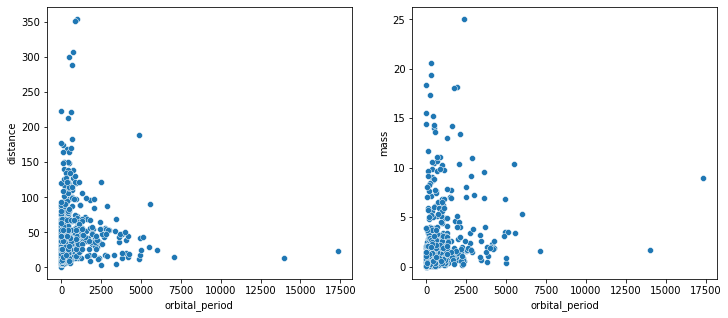

In [40]:
# making the scatter plot

import matplotlib.pyplot as plt

# create the fix and axes object
fig, (ax1, ax2) = plt.subplots(1,2,figsize = (12,5))

# plot one set of variables
sns.scatterplot(x ='orbital_period', y='distance', data=planets, ax =ax1)
sns.scatterplot(x ='orbital_period', y='mass', data=planets, ax =ax2)


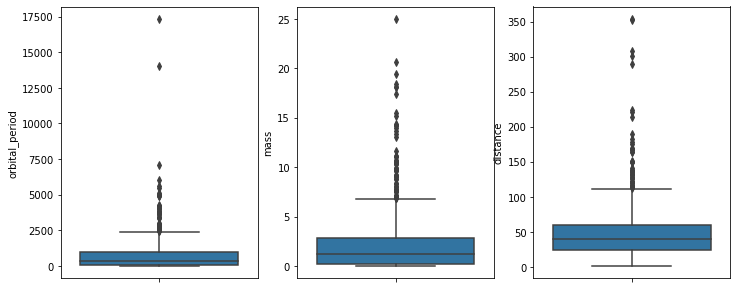

In [41]:
# box plot
#create the axes and figure objects

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize = (12,5))

sns.boxplot(y=planets['orbital_period'], ax=ax1)
sns.boxplot(y=planets['mass'], ax=ax2)
sns.boxplot(y=planets['distance'], ax=ax3)

# Objective 02 - use scikit-learn pipelines


encode (categorical to numerical)--> impute (missing values accounting) --> standardizing --> normalizing variables

In [42]:
# load the Data!
penguins = sns.load_dataset('penguins')

#remove the NaNs and nulls
penguins.dropna(inplace = True)

penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [43]:
# using the following equation sex = species + bill_length_mm + bill_depth_mm + flipper_length_mm + body_mass_g

# species is cetegorical and four numerical 
# Use OHE 

# imports
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# set up the one hot encoder method 
categorical_features = ['species']
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder())]) #sklearn.pipeline.Pipeline(), where each step in the pipeline is tuple of the name and transformer or estimator.

# ser up the preprocessor/column transformer
preprocessor = ColumnTransformer(transformers=[('cat', categorical_transformer, categorical_features)])

#append classifier to pre processing pipeline
# now we have a ful prediction pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', LogisticRegression())])

In [44]:
# Select Features
features = ['species', 'bill_length_mm' , 'bill_depth_mm' , 'flipper_length_mm', 'body_mass_g']
X = penguins[features]

#encode the 'sex' column
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
penguins['sex_encode'] = le.fit_transform(penguins['sex'])

#set the target array
y = penguins['sex_encode'] 

In [45]:
# apply pipeline

# separate into the training and test 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

#fit the model with out logistics regression classifier
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.38095238095238093

#Objective 03 - use scikit-learn for decision trees


In [49]:
# Imports!
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

# Use the decision tree classifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Set-up the one-hot encoder method
categorical_features = ['species']
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder())])

# Set up our preprocessor/column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)])

# Add the classifier to the preprocessing pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', DecisionTreeClassifier())])

In [50]:
# select the features

import pandas as pd
import seaborn as sns

penguins = sns.load_dataset("penguins")
penguins.dropna(inplace=True)

# Select features
features = ['species', 'bill_length_mm' , 'bill_depth_mm' , 'flipper_length_mm', 'body_mass_g']
X = penguins[features]

# Encode the 'sex' column
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
penguins['sex_encode'] = le.fit_transform(penguins['sex'])

# Set target array
y = penguins['sex_encode']

# Apply the pipeline

# Separate into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Fit the model with our logistic regression classifier
pipeline.fit(X_train, y_train)
print("model score: %.3f" % pipeline.score(X_test, y_test))

model score: 0.417


# Objective 04 - get and interpret feature importances of a tree-based model


In [53]:
# import the libraries and data set
from sklearn.datasets import load_wine
import pandas as pd

# load the data and convert in DataFrame
data = load_wine()
df_wine = pd.DataFrame(data.data, columns = data.feature_names)
df_wine['target'] = pd.Series(data.target)

df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [56]:
# separate into features and array
X = df_wine.drop('target', axis = 1)
y = df_wine['target']

# import train_test_split function
from sklearn.model_selection import train_test_split

#split the data set into training and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [57]:
# Use the decision tree classifier 
from sklearn.tree import DecisionTreeClassifier

# Instantiate the classifier
classifier=DecisionTreeClassifier()

# Train the model using the training sets
classifier.fit(X_train,y_train)

# Find the model score
print("Decision tree model score: %.3f" % classifier.score(X_test, y_test))

Decision tree model score: 0.933


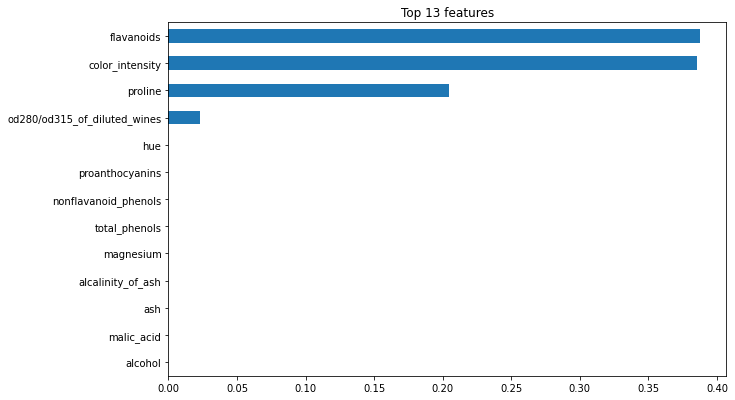

In [59]:
# plot the features importances
import matplotlib.pyplot as plt

importances = pd.Series(classifier.feature_importances_, X.columns)

# plot the top n features importances
n = 13
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh()